In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from bs4 import BeautifulSoup
import time
import numpy as np
import pandas as pd

In [2]:
ser = Service('./pandas/chromedriver/chromedriver.exe')
driver = webdriver.Chrome(service = ser)

In [3]:
url = 'https://www.instagram.com/'
driver.get(url)

In [4]:
def insta_search(word):
    url = 'https://www.instagram.com/explore/tags/' + word
#     url = 'https://www.instagram.com/explore/tags/{}'.format(word)
    return url

In [5]:
word = '제주도맛집'
url = insta_search(word)
url

'https://www.instagram.com/explore/tags/제주도맛집'

In [6]:
from selenium.webdriver.common.by import By

def select_first(driver):
    first = driver.find_element(By.CSS_SELECTOR, 'div._9AhH0')
    first.click()
    time.sleep(3)

select_first(driver)

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"div._9AhH0"}
  (Session info: chrome=97.0.4692.71)
Stacktrace:
Backtrace:
	Ordinal0 [0x0047FDC3+2555331]
	Ordinal0 [0x004177F1+2127857]
	Ordinal0 [0x00312E08+1060360]
	Ordinal0 [0x0033E49E+1238174]
	Ordinal0 [0x0033E69B+1238683]
	Ordinal0 [0x00369252+1413714]
	Ordinal0 [0x00357B54+1342292]
	Ordinal0 [0x003675FA+1406458]
	Ordinal0 [0x00357976+1341814]
	Ordinal0 [0x003336B6+1193654]
	Ordinal0 [0x00334546+1197382]
	GetHandleVerifier [0x00619622+1619522]
	GetHandleVerifier [0x006C882C+2336844]
	GetHandleVerifier [0x005123E1+541697]
	GetHandleVerifier [0x00511443+537699]
	Ordinal0 [0x0041D18E+2150798]
	Ordinal0 [0x00421518+2168088]
	Ordinal0 [0x00421660+2168416]
	Ordinal0 [0x0042B330+2208560]
	BaseThreadInitThunk [0x7781FA29+25]
	RtlGetAppContainerNamedObjectPath [0x77DD7A9E+286]
	RtlGetAppContainerNamedObjectPath [0x77DD7A6E+238]


In [ ]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
soup

In [ ]:
import unicodedata

content = soup.select('div.C4VMK > span')[0].text
content = unicodedata.normalize('NFC', content)

content

In [ ]:
import re

tags = re.findall(r'#[^\s#,\\]+', content)
tags

In [ ]:
date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
date

In [ ]:
like = soup.select('a.zV_Nj > span')
like

In [ ]:
place = soup.select('a.O4GlU')
place = unicodedata.normalize('NFC', content)
place

In [ ]:
def get_content(driver):
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    try:
        content = soup.select('div.C4VMK > span')[0].text
        content = unicodedata.normalize('NFC', content)
    except:
        content = ' '
    try:
        tags = re.findall(r'#[^\s#,\\]+', content)
    except:
        tags = ''
    date = soup.select('time._1o9PC.Nzb55')[0]['datetime'][:10]
    try:    
        like = soup.select('a.zV_Nj > span')[0].text
    except:
        like = 0
    try:    
        place = soup.select('a.O4GlU')
        place = unicodedata.normalize('NFC', place)
    except:
        place = ''
    
    data = [content, date, like, place, tags]
    
    return(data)

In [ ]:
mylist = get_content(driver)
mylist

In [ ]:
def move_next(driver):
    right = driver.find_element(By.CSS_SELECTOR, 'div.l8mY4.feth3')
    right.click()
    time.sleep(3)

move_next(driver)

In [ ]:
def insta_crowling(word, n):
    url = insta_search(word)
    
    driver.get(url)
    time.sleep(5)
    
    select_first(driver)
    time.sleep(5)
    
    result = []
    
    for i in range(n):
        try:
            data = get_content(driver)
            result.append(data)
            move_next(driver)
        except:
            time.sleep(2)
            move_next(driver)
    return(result)

In [ ]:
result = insta_crowling('제주도맛집', 10)
result

In [ ]:
result_df = pd.DataFrame(result)
result_df.columns = ['content', 'date', 'like', 'place', 'tags']

result_df.head()

In [ ]:
jeju_insta_df = pd.DataFrame()

f_list = ['1_crawling_jejudoMatJip.xlsx', '1_crawling_jejudoGwanGwang.xlsx',
          '1_crawling_jejuMatJip.xlsx', '1_crawling_jejuYeoHang.xlsx']

for fname in f_list:
    fpath = './pandas/5_Jeju_Hotplace/files/' + fname
    temp = pd.read_excel(fpath)
    jeju_insta_df = jeju_insta_df.append(temp)

In [ ]:
jeju_insta_df.drop_duplicates(subset = ['content'], inplace = True)
jeju_insta_df.shape

In [ ]:
raw_total = pd.read_excel('./pandas/5_Jeju_Hotplace/files/1_crawling_raw.xlsx')
raw_total.head()

In [ ]:
location_counts = raw_total['place'].value_counts()
type(location_counts)

In [ ]:
location_counts_df = pd.DataFrame(location_counts)
type(location_counts_df)
location_counts_df.head()

# location_counts_df.to_execl('./pandas/5_Jeju_Hotplace/3_location_counts.xlsx', index = True)

In [17]:
locations = list(location_counts_df.index)
locations

NameError: name 'location_counts_df' is not defined

In [7]:
# ! pip install requests
import requests

In [8]:
searching = '합정 스타벅스'
url = 'http://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
url

'http://dapi.kakao.com/v2/local/search/keyword.json?query=합정 스타벅스'

In [9]:
headers = {
    "Authorization": "KakaoAK 7a3af3adf3096046f94ddc76d9ef8866"
}

In [10]:
places = requests.get(url, headers = headers).json()['documents']

places[1]['place_name']
print('위도 = ', places[1]['x'])
print('경도 = ', places[1]['y'])

위도 =  126.91253700818196
경도 =  37.54994959743763


In [11]:
def find_places(searching):
    url = 'http://dapi.kakao.com/v2/local/search/keyword.json?query={}'.format(searching)
    headers = {
    "Authorization": "KakaoAK 7a3af3adf3096046f94ddc76d9ef8866"
    }
    places = requests.get(url, headers = headers).json()['documents']
    
    place = places[0]
    
    name = place['place_name']
    x = place['x']
    y = place['y']
    
    data = [name, x, y, searching]
    
    return(data)

In [12]:
data = find_places('제주공항')
data

['제주국제공항', '126.492769004244', '33.5070789578184', '제주공항']

In [18]:
locations_inform = []

for location in tqdm(locations[:200]):
    try:
        data = find_places(location)
        locations_inform.append(data)
        time.sleep(1)
    except:
        pass
    
locations_inform

NameError: name 'locations' is not defined

In [16]:
len(locations)

NameError: name 'locations' is not defined

In [14]:
# ! pip install tqdm
from tqdm.notebook import tqdm

In [21]:
locations_inform_df = pd.DataFrame(locations_inform)
locations_inform_df.columns = ['name_office', '경도', '위도', 'name']
locations_inform_df.head()
# locations_inform_df.to_excel('./pandas/5_Jeju_Hotplace/3_locations_class.xlsx', index = False)

ValueError: Length mismatch: Expected axis has 0 elements, new values have 4 elements

In [20]:
location_counts_df = pd.read_excel('./pandas/5_Jeju_Hotplace/files/3_location_counts.xlsx', index_col = 0)
location_inform_df = pd.read_excel('./pandas/5_Jeju_Hotplace/files/3_locations.xlsx')

location_counts_df.head()
# location_inform_df.head()

,place
Jeju,271
Jeju-do,179
Jungle Book by Alice,108
Seogwipo,66
제주도 크리스마스 박물관,59


In [22]:
location_data = pd.merge(location_inform_df,
                        location_counts_df, how = 'inner',
                        left_on = 'name_official',
                        right_index = True)

location_data.head()

,name_official,경도,위도,인스타위치명,place
1,서귀포잠수함,126.558616,33.239303,Seogwipo,1
308,서귀포잠수함,126.558616,33.239303,서귀포잠수함,1
3,할로비치,127.020826,37.518211,할로비치,51
4,제주에인감귤밭,126.539410,33.256610,제주에인감귤밭,48
5,제주도,126.545876,33.379777,Jeju Island,4


In [23]:
# ! pip install wordcloud
location_data['name_official'].value_counts()

오설록티뮤지엄           3
서귀포잠수함            2
천지연폭포             2
빌라드아토             2
비자림               2
                 ..
투썸플레이스 제주애월한담점    1
하늘고래              1
문쏘                1
성산일출봉             1
신풍목장              1
Name: name_official, Length: 416, dtype: int64

In [24]:
location_data = location_data.pivot_table(values = 'place',
                             index = ['name_official', '경도', '위도'],
                             aggfunc = 'sum')
location_data

# location_data = location_data.pivot_table(index = ['name_official','경도','위도'],
#                                           values = 'place',
#                                           aggfunc='sum')
# location_data.head()

,,,place
name_official,경도,위도,
73st,126.455109,33.456989,1
가드망제,126.532954,33.500991,1
가배,126.505570,33.231541,1
가시식당,126.771438,33.353060,2
가시아방국수,126.918072,33.438605,2
...,...,...,...
황궁쟁반짜장,129.110405,35.197355,1
황우지해안,126.550528,33.241467,2
훈남횟집,126.667858,33.542086,1


In [25]:
location_data.sort_values('place', ascending=False)

,,,place
name_official,경도,위도,
할로비치,127.020826,37.518211,51
제주에인감귤밭,126.539410,33.256610,48
석부작박물관,126.536502,33.250403,36
위미동백나무군락,126.674731,33.272939,18
밥깡패,126.263436,33.410093,16
...,...,...,...
산방산,126.313425,33.241304,1
사이카레,126.381107,33.484245,1
사락,126.307741,33.228771,1


In [26]:
# pip install folium
import folium

In [27]:
# 기본좌표
latitude = 37.394946
longitude = 127.111104

m = folium.Map(location = [latitude, longitude],
              width = 700,
              hight = 300,
              zoom_start = 15)

folium.Marker(location = [latitude, longitude],
             popup = '<iframe width="703" height="395" src="https://www.youtube.com/embed/h8V3bm8ioGM" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>',
             tooltip = '선릉역 멀티캠퍼스',
             icon = folium.Icon(color = 'red',
                               icon_color = 'white',
                                icon = 'wifi',
                               prefix = 'fa')).add_to(m)  #fontawesome


folium.CircleMarker(location = [latitude, longitude],
                   color = 'tomato',
                   radius = 50,
                   tooltip = '활동반경',
                    ).add_to(m)

m

In [28]:
location_data = pd.read_excel('./pandas/5_Jeju_Hotplace/files/3_location_inform.xlsx')
location_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name_official  416 non-null    object 
 1   경도             417 non-null    float64
 2   위도             417 non-null    float64
 3   place          417 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 13.2+ KB


In [29]:
Mt_Hanla = [33.362500, 126.533694]
map_jeju = folium.Map(location = Mt_Hanla,
                     zoom_start = 10)
folium.TileLayer().add_to(map_jeju)  #https://deparkes.co.uk/2016/06/10/folium-map-tiles/

for i in range(len(location_data)):
    name = location_data['name_official'][i]
    count = location_data['place'][i]
    size = int(count*2)
    lng = location_data['경도'][i]
    lat = location_data['위도'][i]
    folium.CircleMarker(location = [lat, lng],
                       radius = size,
                       color = 'red',
                       popup = name).add_to(map_jeju)

    
map_jeju

In [ ]:
# map_jeju.save('./pandas/5_Jeju_Hotplace/3_jeju.html')

from folium.plugins import MarkerCluster

In [ ]:
locations = []
names = []

for i in range(len(location_data)):
    data = location_data.iloc[i]
    locations.append([data['위도'], data['경도']])
    names.append(data['name_official'])
    
# locations
# names

Mt_Hanla = [33.362500, 126.533694]
map_jeju2 = folium.Map(location = Mt_Hanla, zoom_start = 10)

tiles = ['stamenwatercolor', 'cartodbpositron', 
         'openstreetmap', 'stamenterrain',
#         'Mapbox Control Room'
        ]

for tile in tiles:
    folium.TileLayer(tile).add_to(map_jeju2)
    
marker_cluster = MarkerCluster(locations = locations,
                             popups = names,
                             name = 'Jeju',
                             overlay = True,
                             control = True).add_to(map_jeju2)

folium.LayerControl().add_to(map_jeju2)

map_jeju2

In [ ]:
# map_jeju2.save('./pandas/5_Jeju_Hotplace/3_jeju_cluster.html')

In [ ]:
raw_total = pd.read_excel('./pandas/5_Jeju_Hotplace/files/1_crawling_raw.xlsx')
raw_total.head()

In [ ]:
select_word = '해돋이'

check_list = []

for content in raw_total['content']:
    if select_word in content:
        check_list.append(True)
    else:
        check_list.append(False)

# check_list
select_df = raw_total[check_list]
# len(select_df['content'])

In [ ]:
select_df.index

for i in select_df.index:
    print(select_df.loc[i,'content'])
    print('-'*50)

In [ ]:
select_word_list = ['해돋이','박물관','힐링','게스트하우스','섭지코지']

def select_word(select_word_list):
    for select_word in select_word_list:
        check_list = []
        for content in raw_total['content']:
            if select_word in content:
                check_list.append(True)
            else:
                check_list.append(False)
        select_df = raw_total[check_list]
        fpath = './pandas/5_Jeju_Hotplace/4_select_data_class{}.xlsx'.format(select_word)
        select_df.to_excel(fpath, index = False)

In [ ]:
select_word_list = ['해돋이','박물관','힐링','게스트하우스','섭지코지']
select_word(select_word_list)

In [ ]:
# !pip install wordcloud

In [1]:
import pandas as pd
import wordcloud

In [2]:
raw_total = pd.read_excel('./pandas/5_Jeju_Hotplace/1_crawling_raw.xlsx')
raw_total.head()

,content,date,like,place,tags
0,제주도 도착~~공항근처 #제주분식 에서 먹은 첫식사만족만족!#제주맛집#제주도맛집#제...,2019-01-01,705,NaN,"['#제주분식', '#제주맛집', '#제주도맛집', '#제주맛집추천', '#제주도맛..."
1,﻿#함덕맛집 무거버거 바다 보면서 먹으니까 더 꿀맛👍🏻 #제주도카페투어#제주일상#함...,2019-01-01,384,NaN,"['#함덕맛집', '#제주도카페투어', '#제주일상', '#함덕', '#jejudo..."
2,.대만족 제주스!.#동문시장#제주동문시장#제주도기념품#제주기념품#제주스는완벽#제주도...,2019-01-01,595,NaN,"['#동문시장', '#제주동문시장', '#제주도기념품', '#제주기념품', '#제주..."
3,#제주여행#2일차무거버거 제주와서 먹은것중에 제일 맛있었음!#제주도여행#제주맛집#함...,2019-01-01,412,NaN,"['#제주여행', '#2일차무거버거', '#제주도여행', '#제주맛집', '#함덕맛..."
4,"🥇1월 영업 안내🥇-1월 2일, 3일(수,목)은 쉬어갑니다-1월 4일,5일,6일(금...",2019-01-01,364,로타리과자점,[]


In [3]:
raw_total['tags'][:10]

0    ['#제주분식', '#제주맛집', '#제주도맛집', '#제주맛집추천', '#제주도맛...
1    ['#함덕맛집', '#제주도카페투어', '#제주일상', '#함덕', '#jejudo...
2    ['#동문시장', '#제주동문시장', '#제주도기념품', '#제주기념품', '#제주...
3    ['#제주여행', '#2일차무거버거', '#제주도여행', '#제주맛집', '#함덕맛...
4                                                   []
5    ['#제주마카롱', '#월정리카페콧수염', '#월정리맛집', '#월정리카페', '#...
6                                                   []
7    ['#제주분식', '#제주모닥치기', '#돔베라면', '#돔베덮밥', '#전복김밥'...
8    ['#제주도', '#제주맛집', '#제주도맛집', '#월정리맛집', '#월정리', ...
9    ['#서면클럽', '#커플여행', '#여자옷', '#잠실카페', '#독소', '#강...
Name: tags, dtype: object

In [48]:
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '")
    for tags in tags_list:
        tags_total.append(tags)
        
tags_total

['#제주분식',
 '#제주맛집',
 '#제주도맛집',
 '#제주맛집추천',
 '#제주도맛집추천',
 '#제주도',
 '#제주맛집',
 '#용두암',
 '#신제주맛집',
 '#연동맛집',
 '#제주연동맛집',
 '#애월맛집',
 '#연동제주분식',
 '#제주공항근처맛집',
 '#제주공항맛집',
 '#돔베김밥',
 '#전복김밥',
 '#제주돈까스',
 '#jeju',
 '#제주도가볼만한곳',
 '#함덕맛집',
 '#제주도카페투어',
 '#제주일상',
 '#함덕',
 '#jejudo',
 '#jeju',
 '#제주도맛집',
 '#함덕맛집무거버거짱',
 '#일상',
 '#제주살이',
 '#제주도살이',
 '#함덕해수욕장',
 '#함덕카페',
 '#함덕맛집',
 '#제주카페',
 '#제주도카페',
 '#제주도맛집추천',
 '#제주도민',
 '#제주도민맛집',
 '#제주도맛집',
 '#제주맛집',
 '#제주도여행',
 '#동문시장',
 '#제주동문시장',
 '#제주도기념품',
 '#제주기념품',
 '#제주스는완벽',
 '#제주도맛집',
 '#제주맛집',
 '#제주도주스',
 '#제주도한라봉주스',
 '#제주도카페',
 '#제주카페',
 '#제주도기념품',
 '#제주기념품',
 '#제주감성소품',
 '#제주도여행',
 '#제주여행',
 '#2일차무거버거',
 '#제주도여행',
 '#제주맛집',
 '#함덕맛집',
 '#제주도버거',
 '#함덕해변',
 '#제주도맛집추천',
 '#제주도가볼만한곳',
 '#여행스타그램',
 '#제주도수제버거',
 '#제주여행',
 '#제주도카페',
 '#제주도맛집',
 '#조천읍',
 '#함덕맛집무거버거짱',
 '#조천카페',
 '#함덕해수욕장',
 '',
 '#제주마카롱',
 '#월정리카페콧수염',
 '#월정리맛집',
 '#월정리카페',
 '#월정리',
 '#구좌읍맛집',
 '#제주맛집',
 '#제주도맛집',
 '#함덕해수욕장',
 '#제주도민맛집',
 '#함덕맛집',
 '#성산맛집',
 '#구좌맛집',
 '#애월맛집',
 '#서귀포맛집',

In [45]:
from collections import Counter
tag_counts = Counter(tags_total)

tag_counts_selected = tag_counts.most_common(50)
tag_counts_selected

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주도', 2053),
 ('#제주', 1538),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#jeju', 749),
 ('#일상', 701),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('', 587),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#선팔', 503),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#여행스타그램', 472),
 ('#제주반영구', 440),
 ('#제주도관광', 440),
 ('#여행', 436),
 ('#제주눈썹문신', 434),
 ('#서귀포눈썹문신', 420),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#눈썹문신', 405),
 ('#반영구', 405),
 ('#중문맛집', 404),
 ('#제주일상', 398),
 ('#제주속눈썹', 397)]

In [49]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud 
import platform

In [50]:
font_path = 'c://Windows/Fonts/malgun.ttf'

In [51]:
STOPWORDS = ['#일상', '#선팔', '#제주도', '#jeju', '#반영구', '#제주자연눈썹',
'#서귀포눈썹문신', '#제주눈썹문신', '#소통', '#맞팔','#제주눈썹문신','#서귀포눈썹문신','#눈썹문신',
            '#제주속눈썹','#제주남자눈썹문신','#서귀포자연눈썹','#서귀포남자눈썹문신',
            '#서귀포반영구','#제주메이크업','#제주반영구','#서귀포속눈썹','#daily',
            '#가족여행','#jejuisland','','#셀카','#제주속눈썹연장','#좋아요',]

tag_total_selected = []

for tag in tags_total:
    if not tag in STOPWORDS:
        tag_total_selected.append(tag)

tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)

[('#제주맛집', 3412),
 ('#제주도맛집', 3149),
 ('#제주여행', 3020),
 ('#제주관광', 2827),
 ('#제주', 1538),
 ('#제주도여행', 1454),
 ('#서귀포맛집', 1330),
 ('#제주도가볼만한곳', 1014),
 ('#제주핫플레이스', 835),
 ('#서귀포', 825),
 ('#제주흑돼지맛집', 685),
 ('#제주맛집추천', 675),
 ('#제주도흑돼지맛집', 669),
 ('#제주도흑돼지', 663),
 ('#성산일출봉', 650),
 ('#제주흑돼지', 648),
 ('#협재맛집', 602),
 ('#제주카페', 600),
 ('#제주도그램', 594),
 ('#서귀포흑돼지맛집', 593),
 ('#서귀포흑돼지', 577),
 ('#제주도민', 570),
 ('#섭지코지', 556),
 ('#성산일출봉맛집', 545),
 ('#섭지코지맛집', 511),
 ('#제주가볼만한곳', 497),
 ('#통갈치구이', 494),
 ('#제주통갈치구이', 485),
 ('#제주핫플', 483),
 ('#제주살이', 480),
 ('#제주서귀포맛집', 479),
 ('#제주도민맛집', 477),
 ('#여행스타그램', 472),
 ('#제주도관광', 440),
 ('#여행', 436),
 ('#제주시', 419),
 ('#제주스타그램', 408),
 ('#중문맛집', 404),
 ('#제주일상', 398),
 ('#먹스타그램', 395),
 ('#카멜리아힐', 379),
 ('#중문흑돼지맛집', 377),
 ('#애월맛집', 373),
 ('#제주도여행코스', 350),
 ('#성산맛집', 316),
 ('#제주해안도로', 311),
 ('#제주시맛집', 311),
 ('#제주공항', 306),
 ('#서귀포맛집추천', 303),
 ('#첫줄', 287)]

(-0.5, 799.5, 399.5, -0.5)

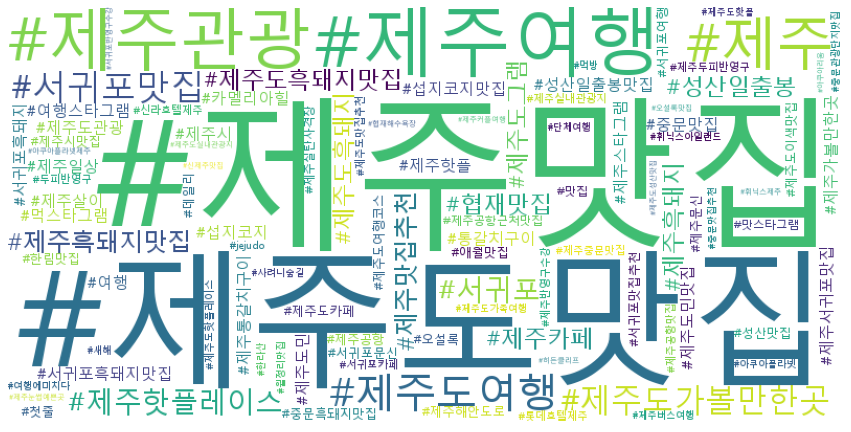

In [52]:
wordcloud = WordCloud(font_path = font_path,
            background_color = 'white',
            max_words = 100,
            width = 800,
            height = 400,
            relative_scaling = 0.3,
            ).generate_from_frequencies(tag_counts_selected)

plt.figure(figsize = (15,10))
plt.imshow(wordcloud)
plt.axis('off')
# plt.show()
# plt.savefig('./pandas/5_Jeju_Hotplace/word_cloud_class.png')